# **WORLD HAPPINESS REPORT**


I have hypothesis suggestions for analyzing the Happiness Score dataset:

1️⃣ Regional Happiness Score Differences

Hypothesis:
H₀ (Null Hypothesis): There is no significant difference in the average happiness scores across different regions (continents, country groups, etc.).
H₁ (Alternative Hypothesis): There is a significant difference in the average happiness scores across different regions.
Test: ANOVA (or t-test if there are only two groups)

2️⃣ Per Capita Income and Happiness Relationship

Hypothesis:
H₀: There is no significant relationship between per capita income and happiness score.
H₁: There is a significant relationship between per capita income and happiness score.
Test: Pearson Correlation Test

3️⃣ Social Support and Happiness Relationship

Hypothesis:
H₀: There is no significant relationship between social support level and happiness score.
H₁: There is a positive relationship between social support level and happiness score.
Test: Correlation Analysis

4️⃣ Comparison of Happiness Scores Between 2020 and 2024

Hypothesis:
H₀: There is no significant difference in happiness scores between 2020 and 2024.
H₁: There is a significant difference in happiness scores between 2020 and 2024.
Test: Independent Two-Sample t-Test

In [29]:
import pandas as pd  
import numpy as np  

df= pd.read_csv(r"C:\Users\balla\OneDrive\Documents\CapStoneProject_2025\Data\Combined_Cleaned.csv")

print(df.head())

  Country_name  Happiness_Rank  Happiness_score  Upperwhisker  Lowerwhisker  \
0      Finland               1             7.81          7.87          7.75   
1      Denmark               2             7.65          7.71          7.58   
2  Switzerland               3             7.56          7.63          7.49   
3      Iceland               4             7.50          7.62          7.39   
4       Norway               5             7.49          7.56          7.42   

   Economy_GDP_per_Capita  Social_support  Healthy_life_expectancy  \
0                    1.29            1.50                     0.96   
1                    1.33            1.50                     0.98   
2                    1.39            1.47                     1.04   
3                    1.33            1.55                     1.00   
4                    1.42            1.50                     1.01   

   Freedom_to_make_life_choices  Generosity  Perceptions_of_corruption  \
0                          0.6

In [3]:
print(df.columns)

Index(['Country_name', 'Happiness_Rank', 'Happiness_score', 'Upperwhisker',
       'Lowerwhisker', 'Economy_GDP_per_Capita', 'Social_support',
       'Healthy_life_expectancy', 'Freedom_to_make_life_choices', 'Generosity',
       'Perceptions_of_corruption', 'Year'],
      dtype='object')


1️⃣ Regional Happiness Score Differences (Independent Two-Sample t-Test)

seperating countries Asia and Europe :

In [5]:
asia= ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 
       'China', 'Cyprus', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 
       'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar',
         'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Russia', 'Saudi Arabia',
           'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Tajikistan', 'Thailand', 'Timor-Leste',
             'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen']

europe = ['Albania', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 
          'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 
          'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kazakhstan', 'Kosovo', 'Latvia', 'Liechtenstein',
            'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia',
              'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia',
                'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom', 'Vatican City']

americas = ['Antigua and Barbuda', 'Argentina', 'Bahamas', 'Barbados', 'Belize', 'Bolivia', 'Brazil', 'Canada',
             'Chile', 'Colombia', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic', 'Ecuador', 'El Salvador', 
             'Grenada', 'Guatemala', 'Guyana', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama',
               'Paraguay', 'Peru', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 
               'Suriname', 'Trinidad and Tobago', 'United States', 'Uruguay', 'Venezuela']

pasific =[ 'Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand', 'Palau', 
          'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu']

island = ['Antigua and Barbuda', 'Australia', 'Bahamas', 'Barbados', 'Belize', 'Cuba', 'Dominica', 
          'Dominican Republic', 'Fiji', 'Grenada', 'Guatemala', 'Guyana', 'Haiti', 'Honduras', 'Jamaica', 
          'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 
          'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa', 'Solomon Islands', 
          'Tonga', 'Trinidad and Tobago', 'Tuvalu', 'Vanuatu']
# Create a new column for region
def categorize_region(country):
    if country in asia:
        return 'Asia'
    elif country in europe:
        return 'Europe'
    elif country in americas:
        return 'Americas'
    elif country in pasific:
        return 'Pasific'
    elif country in island:
        return 'Island'
    else:
        return 'Other'  # If any country is not in the Asia or Europe lists

df['Region'] = df['Country_name'].apply(categorize_region)


In [9]:
import pandas as pd
import scipy.stats as stats

# Separate data for Asia and Europe
asia_data = df[df['Region'] == 'Asia']['Happiness_score']
europe_data = df[df['Region'] == 'Europe']['Happiness_score']

# Perform independent two-sample t-test
t_test_result = stats.ttest_ind(asia_data, europe_data)
print("T-test Result between Asia and Europe:", t_test_result)


T-test Result between Asia and Europe: TtestResult(statistic=-12.531251817723154, pvalue=2.4120526723954125e-30, df=376.0)


Conclusion:
Given that the p-value is extremely small (much smaller than the common significance threshold of 0.05), you can reject the null hypothesis (H₀) that there is no significant difference in happiness scores between Asia and Europe. This means that there is a statistically significant difference between the two regions' happiness scores.

The negative t-statistic suggests that Asia's happiness score is lower than Europe's on average.

C:\Users\balla\AppData\Local\Temp\ipykernel_3336\242879408.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Happiness_score', data=df, order=['Asia', 'Europe'], palette='coolwarm')


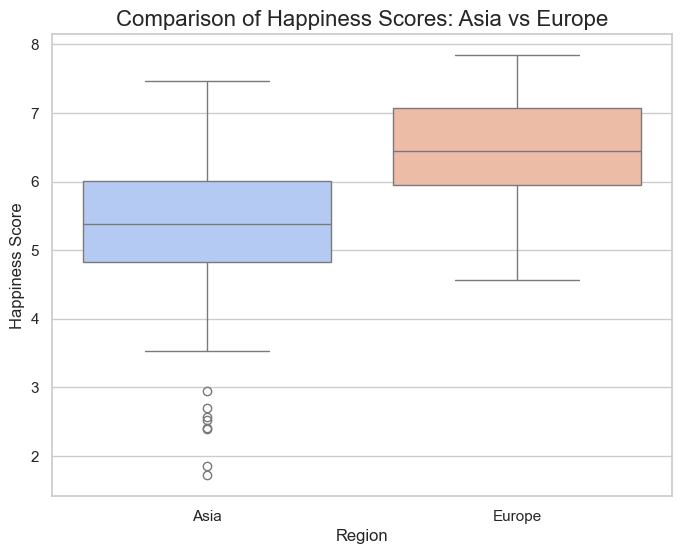

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the seaborn style for better visuals
sns.set(style="whitegrid")

# Create a box plot to visualize the distribution of happiness scores between Asia and Europe
plt.figure(figsize=(8, 6))
sns.boxplot(x='Region', y='Happiness_score', data=df, order=['Asia', 'Europe'], palette='coolwarm')

# Adding title and labels
plt.title('Comparison of Happiness Scores: Asia vs Europe', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)

# Show the plot
plt.show()


2️⃣ Per Capita Income and Happiness Relationship (Pearson Correlation Test)

In [12]:
from scipy.stats import pearsonr

# Assuming the relevant columns are 'Economy_(GDP_per_Capita)' and 'Happiness_score'
gdp_per_capita = df['Economy_GDP_per_Capita']
happiness_score = df['Happiness_score']

# Perform Pearson correlation test
correlation_coefficient, p_value = pearsonr(gdp_per_capita, happiness_score)

# Display the result
print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")



Pearson Correlation Coefficient: 0.6798112559195996
P-value: 7.416501779942453e-100


Conclusion:
There is a significant positive correlation between GDP per Capita and Happiness Score, meaning that higher GDP per capita tends to be associated with higher happiness scores. The strength of this relationship is moderate to strong.

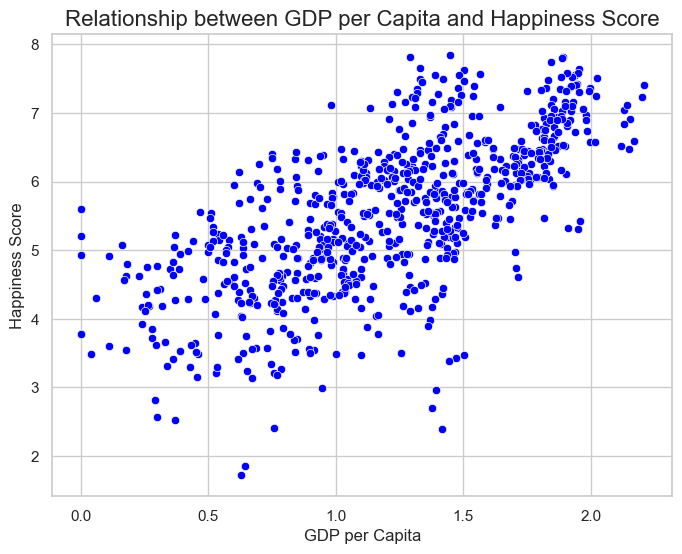

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot
plt.figure(figsize=(8, 6))

# Create scatter plot
sns.scatterplot(x=gdp_per_capita, y=happiness_score, color='blue')

# Add title and labels
plt.title('Relationship between GDP per Capita and Happiness Score', fontsize=16)
plt.xlabel('GDP per Capita', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)

# Show the plot
plt.show()


3️⃣ Social Support and Happiness Relationship (Correlation Test)

In [15]:
from scipy.stats import pearsonr

# Assuming the relevant columns are 'Social_support' and 'Happiness_score'
social_support = df['Social_support']
happiness_score = df['Happiness_score']

# Perform Pearson correlation test
correlation_coefficient, p_value = pearsonr(social_support, happiness_score)

# Display the result
print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")


Pearson Correlation Coefficient: 0.6975926088247579
P-value: 3.248528751538195e-107


Conclusion:
There is a significant positive correlation between Social Support and Happiness Score, meaning that higher social support tends to be associated with higher happiness scores. The strength of the relationship is moderate to strong.

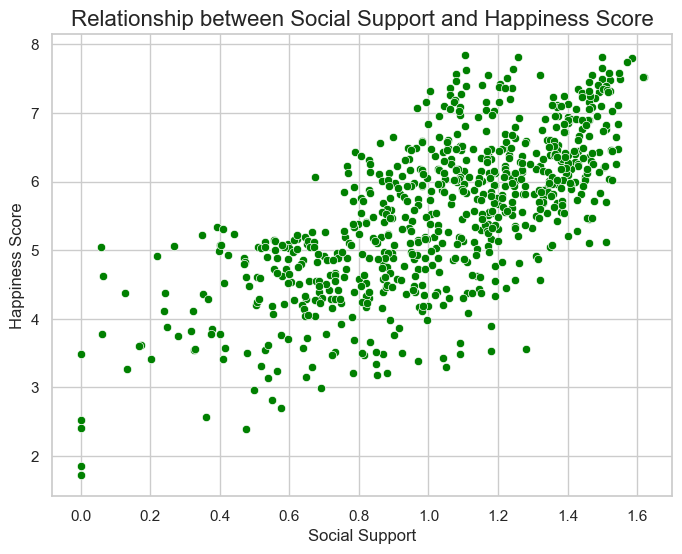

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot
plt.figure(figsize=(8, 6))

# Create scatter plot
sns.scatterplot(x=social_support, y=happiness_score, color='green')

# Add title and labels
plt.title('Relationship between Social Support and Happiness Score', fontsize=16)
plt.xlabel('Social Support', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)

# Show the plot
plt.show()


4️⃣ Comparison of Happiness Scores Between 2020 and 2024  

In [62]:
import pandas as pd  
import numpy as np  

df= pd.read_csv(r"C:\Users\balla\OneDrive\Documents\CapStoneProject_2025\Data\Combined_Cleaned.csv")

print(df.head())

  Country_name  Happiness_Rank  Happiness_score  Upperwhisker  Lowerwhisker  \
0      Finland               1             7.81          7.87          7.75   
1      Denmark               2             7.65          7.71          7.58   
2  Switzerland               3             7.56          7.63          7.49   
3      Iceland               4             7.50          7.62          7.39   
4       Norway               5             7.49          7.56          7.42   

   Economy_GDP_per_Capita  Social_support  Healthy_life_expectancy  \
0                    1.29            1.50                     0.96   
1                    1.33            1.50                     0.98   
2                    1.39            1.47                     1.04   
3                    1.33            1.55                     1.00   
4                    1.42            1.50                     1.01   

   Freedom_to_make_life_choices  Generosity  Perceptions_of_corruption  \
0                          0.6

In [63]:
df['Year'] = pd.to_datetime(df['Year'], errors='coerce').dt.year.astype('Int64')


In [64]:
print(df['Year'].head(2000))  # Display the first few rows to verify


0      2020
1      2020
2      2020
3      2020
4      2020
       ... 
723    2024
724    2024
725    2024
726    2024
727    2024
Name: Year, Length: 728, dtype: Int64


In [66]:
from scipy import stats

# Filter the data for 2020 and 2024
data_2020 = df[df['Year'] == 2020]['Happiness_score']
data_2024 = df[df['Year'] == 2024]['Happiness_score']

# Perform independent two-sample t-test
t_test_result = stats.ttest_ind(data_2020, data_2024)

# Display the result
print(f"T-test statistic: {t_test_result.statistic}")
print(f"P-value: {t_test_result.pvalue}")


T-test statistic: -0.40981039323714014
P-value: 0.6822434811499347


Conclusion:
Since the p-value is greater than 0.05, we fail to reject the null hypothesis, meaning that the data provides insufficient evidence to suggest that there is a significant difference in the Happiness Scores between 2020 and 2024.


C:\Users\balla\AppData\Local\Temp\ipykernel_3336\1032206274.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Year', y='Happiness_score', data=df, order=[2020, 2024], palette='coolwarm')


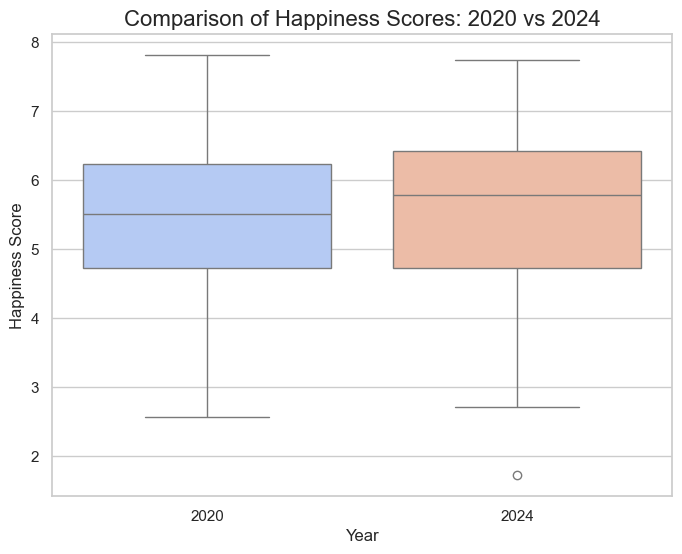

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the seaborn style for better visuals
sns.set(style="whitegrid")

# Create a box plot to visualize the distribution of happiness scores between 2020 and 2024
plt.figure(figsize=(8, 6))
sns.boxplot(x='Year', y='Happiness_score', data=df, order=[2020, 2024], palette='coolwarm')

# Adding title and labels
plt.title('Comparison of Happiness Scores: 2020 vs 2024', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)

# Show the plot
plt.show()


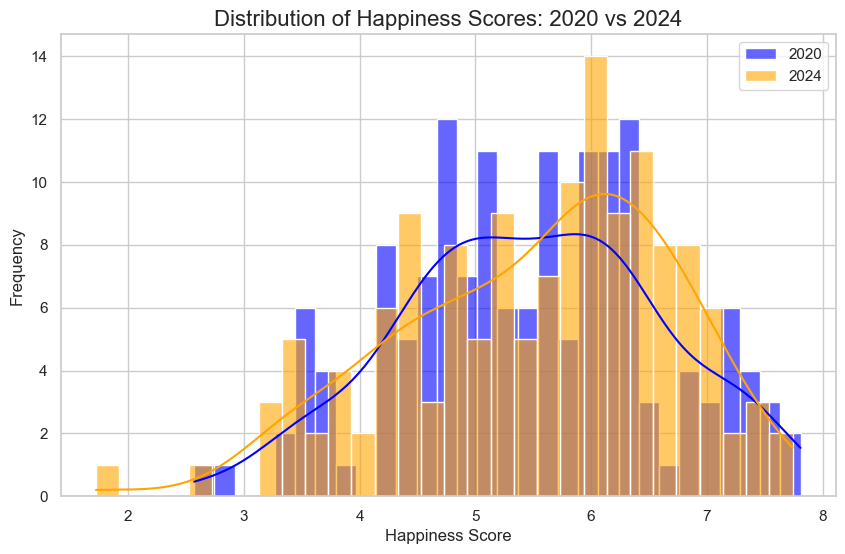

In [68]:
# Filter data for 2020 and 2024
data_2020 = df[df['Year'] == 2020]['Happiness_score']
data_2024 = df[df['Year'] == 2024]['Happiness_score']

# Create histograms for 2020 and 2024
plt.figure(figsize=(10, 6))

# Plot histogram for 2020
sns.histplot(data_2020, kde=True, color='blue', label='2020', bins=30, alpha=0.6)

# Plot histogram for 2024
sns.histplot(data_2024, kde=True, color='orange', label='2024', bins=30, alpha=0.6)

# Add title and labels
plt.title('Distribution of Happiness Scores: 2020 vs 2024', fontsize=16)
plt.xlabel('Happiness Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show legend
plt.legend()

# Show the plot
plt.show()


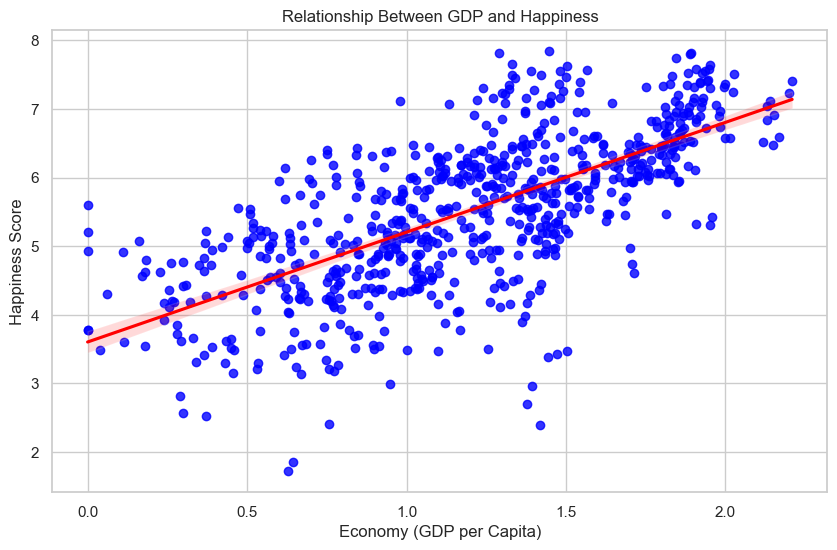

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load your cleaned dataset
df = pd.read_csv(r"C:\Users\balla\OneDrive\Documents\CapStoneProject_2025\Data\Combined_Cleaned.csv")

# Create a scatter plot with a regression line to show the relationship between GDP and Happiness
plt.figure(figsize=(10, 6))
sns.regplot(x='Economy_GDP_per_Capita', y='Happiness_score', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Add titles and labels
plt.title('Relationship Between GDP and Happiness')
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Happiness Score')

# Show the plot
plt.show()
